# Identifying Handwritten Digits

This notebook explores identifying handwritten digits using scikit-learn's built-in handwritten digits dataset.

In [36]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

digits = load_digits()
digits.images.shape

(1797, 8, 8)

The handwritten digits are stored in a three-dimensional array that has 1,797 samples, each comprising 8x8 grid of pixels. 

As always, a picture is worth a thousand words. Plot the first 100 digits.

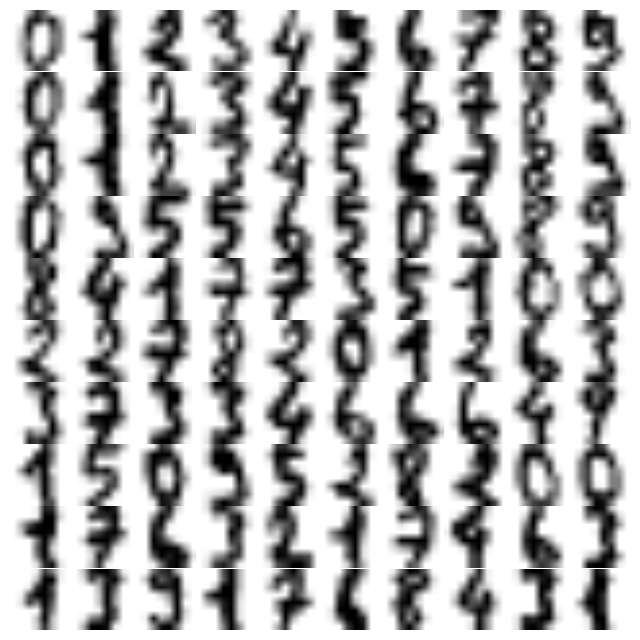

In [37]:
fig, ax = plt.subplots(10, 10, figsize = (8, 8),
                      subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.01, wspace=0.01)
for i, axi in enumerate(ax.flat):
    img = axi.imshow(digits.data[i].reshape(8,8), cmap=plt.cm.gray_r)
    img.set_clim(0, 16)

Scikit-learn expects features in a two-dimensional array, where each row represents a sample and each column a feature. Hence, each 8x8 grid of pixels that represents a handwritten digit could be flattened out to a 64-pixel array in which each pixel becomes a feature.

The *data* and *target* attributes of the *digits* dataset already have the digits in the required format.

A Gaussian naive Bayes model will be used to classify the digits.

In [38]:
print(digits.data.shape, digits.target.shape)

(1797, 64) (1797,)


In [39]:
# step through scikit-learn's standard recipe
X = digits.data
y = digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=555)

from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)

y_predict = GNB.predict(X_test)

from sklearn.metrics import accuracy_score
print("{:.3f}".format(accuracy_score(y_test, y_predict)))

0.847


This simple model achieved an accuracy of 84 percent. For classification problems like this one, a confusion matrix sheds more lights on where predictions went wrong.

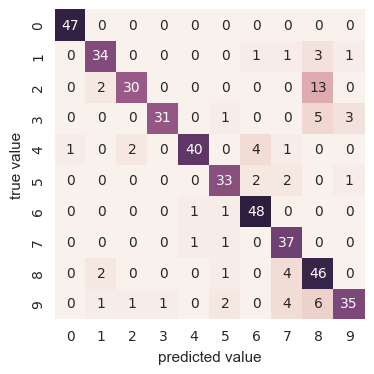

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cmat = confusion_matrix(y_test, y_predict)

sns.heatmap(cmat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

As can be seen from above, digit two was misclassified as digit eight 13 times, digit 9 was misclassified as digit eight 6 times and so on.

A more sophisticated model could improve the predictions substantially.